In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

fontpath = 'C:\Windows\Fonts\gulim.ttc'    # 폰트경로
font = fm.FontProperties(fname=fontpath).get_name()     # 이름을 가져옴
matplotlib.rc("font", family = font)

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20040\3922697014.py:8: SyntaxWarning: invalid escape sequence '\W'
  fontpath = 'C:\Windows\Fonts\gulim.ttc'    # 폰트경로


### 1. 기초 통계 (데이터 소개)

In [2]:
df = pd.read_csv('./data/preprocessing_Data.csv')

In [3]:
len(df.columns)


17

In [4]:
df.columns

Index(['Unnamed: 0', '성별', '고교성적', '학년', '학과', '최근성적', '거주상태', '용돈', '장학금여부',
       '학습시간', '파티활동빈도', '외출시음주량', '음주로인한결석수', '낙제횟수', '연애여부', '부모의음주허용여부',
       '부모관계친밀도'],
      dtype='object')

In [34]:
df.columns = [
'시간','성별', '고교성적','학년','학과','최근성적','거주상태','용돈','장학금여부',
'학습시간','파티활동빈도','외출시음주량','음주로인한결석수','낙제횟수','연애여부','부모의음주허용여부','부모관계친밀도'
]


In [5]:
df.head()

,Unnamed: 0,성별,고교성적,학년,학과,최근성적,거주상태,용돈,장학금여부,학습시간,파티활동빈도,외출시음주량,음주로인한결석수,낙제횟수,연애여부,부모의음주허용여부,부모관계친밀도
0,0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


### 3. 데이터 시각화

#### 2. 범주형-수치형 분석

#### 3. 범주형-범주형 분석

카운트플롯

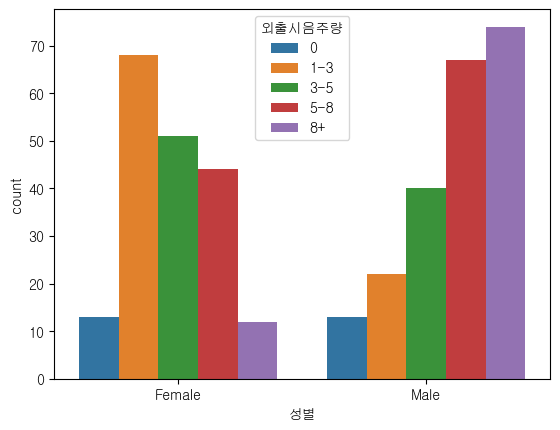

In [64]:
drink_order=['0','1-3','3-5','5-8','8+']

sns.countplot(data = df, x='성별',hue='외출시음주량',hue_order=drink_order)
plt.show()
# 남성이 더 과음하는것을 알수있음

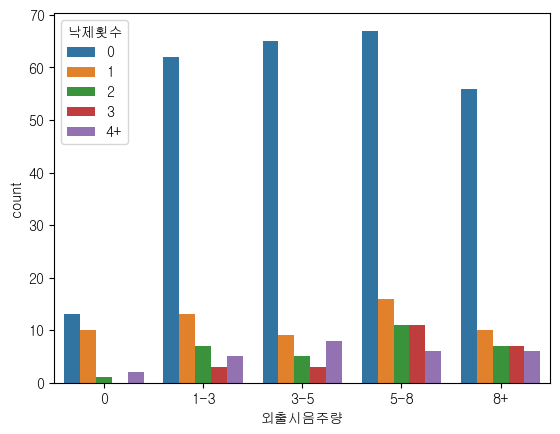

In [67]:
drink_order=['0','1-3','3-5','5-8','8+']
failure_order=['0','1','2','3','4+']


sns.countplot(data = df, x='외출시음주량',hue='낙제횟수',order=drink_order,hue_order=failure_order)
plt.show()

# 외출시 음주량이 많을경우 낙제 과목이 증가함

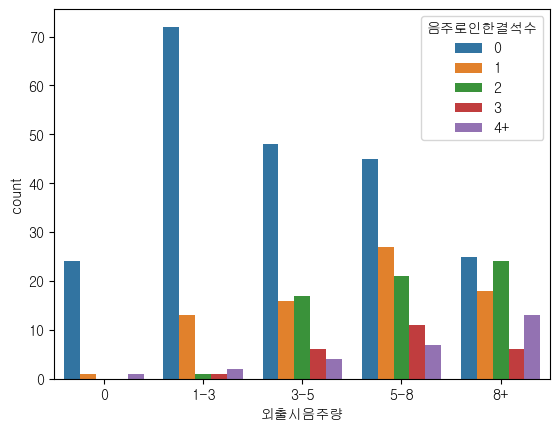

In [68]:
drink_order=['0','1-3','3-5','5-8','8+']
absence_order=['0','1','2','3','4+']
sns.countplot(data = df, x='외출시음주량',hue='음주로인한결석수',order=drink_order,hue_order=absence_order)

plt.show()
# 외출시 음주량이 많을경우 음주로인한 결석수 증가

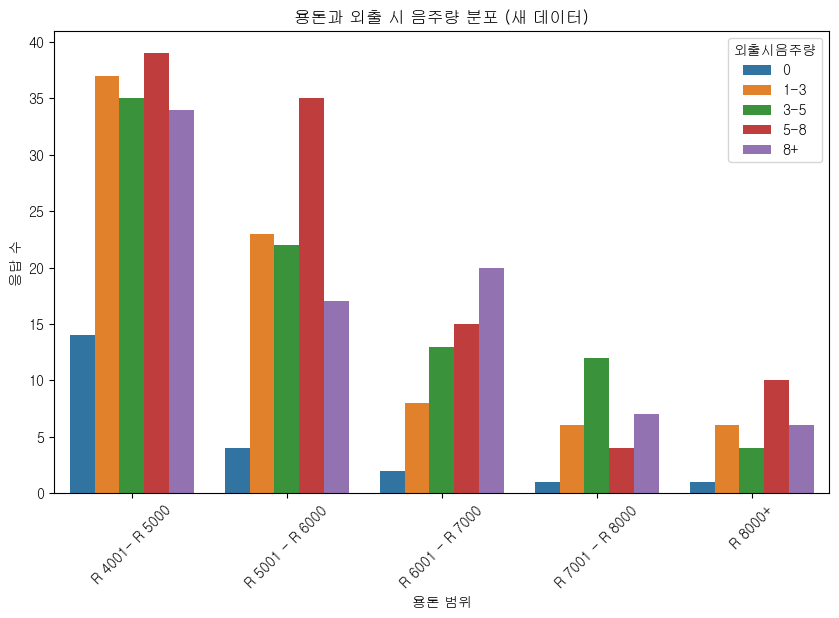

In [62]:


money_order = ['R 4001- R 5000', 'R 5001 - R 6000', 'R 6001 - R 7000', 'R 7001 - R 8000', 'R 8000+']
drink_order=['0','1-3','3-5','5-8','8+']

# Plotting the countplot with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='용돈', hue='외출시음주량', order=money_order,hue_order=drink_order)
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.title("용돈과 외출 시 음주량 분포 (새 데이터)")
plt.xlabel("용돈 범위")
plt.ylabel("응답 수")
plt.show()

#용돈을 적게 받을수록 과음을 하는 경향이 있음

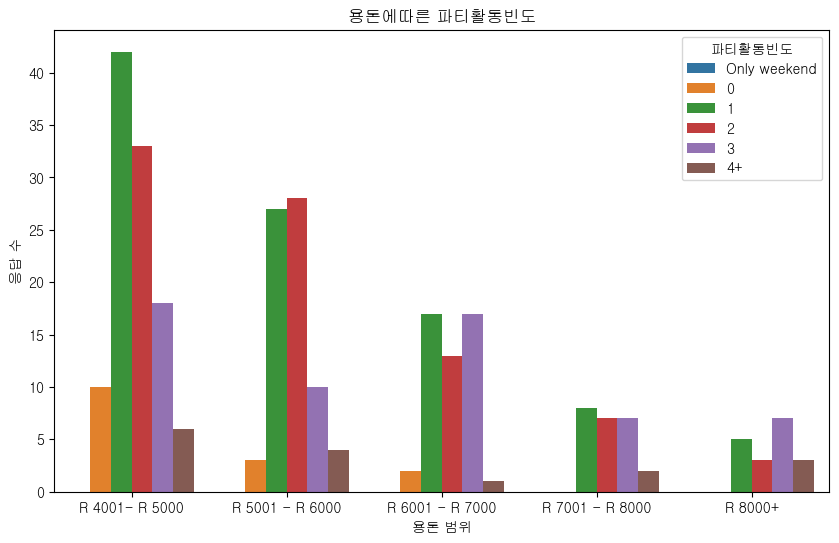

In [63]:
money_order = ['R 4001- R 5000', 'R 5001 - R 6000', 'R 6001 - R 7000', 'R 7001 - R 8000', 'R 8000+']
weekend_order= ['Only weekend','0','1','2','3','4+']

plt.figure(figsize=(10, 6))
sns.countplot(data = df, x='용돈',hue='파티활동빈도',order=money_order,hue_order=weekend_order )
plt.title("용돈에따른 파티활동빈도")
plt.xlabel("용돈 범위")
plt.ylabel("응답 수")
plt.show()
plt.show()

# 용돈이 적을수록 파티에 참여하는 빈도가 높은것으로 집계됨